WORKFLOW 08: Comprehensive Visualization
=========================================

This workflow demonstrates PEACH's comprehensive visualization capabilities:
1. Archetypal space plots (2D and 3D)
2. Training metrics and diagnostics
3. Gene/pattern dotplots and heatmaps
4. Archetype statistics and summaries

All plotting functions save figures to the current directory and can optionally display them.

Example usage:
    python WORKFLOW_08.py

Requirements:
    - peach
    - scanpy
    - matplotlib
    - Trained model with results (from WORKFLOW_03-05)

In [1]:
import scanpy as sc
import peach as pc
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

# For Jupyter: enable inline display of matplotlib figures
# This makes figures display automatically without plt.show()
%matplotlib inline

anndata/__init__.py:44: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
anndata/__init__.py:44: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
anndata/__init__.py:44: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
anndata/__init__.py:44: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
anndata/__init__.py:44: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_D

## Configuration

In [ ]:
# Data path
data_path = Path("~/data/hsc_10k.h5ad")

# Training parameters
n_archetypes = 5
hidden_dims = [256, 128, 64]
n_epochs = 100
seed = 42

# Visualization settings
save_plots = True   # Save figures to files
show_plots = True   # Display interactively (we're in Jupyter)

NB: most visualization functions also have a 3D interactive Plotly render that will display when you run the code in addition to the matplotlib options.

## Step 1: Prepare Complete Analysis (All Prerequisites)

In [3]:
print("Preparing complete analysis pipeline...")
adata = sc.read_h5ad(data_path)
print(f"  Shape: {adata.n_obs:,} cells × {adata.n_vars:,} genes")

# PCA
if 'X_pca' not in adata.obsm:
    print("  Running PCA...")
    sc.tl.pca(adata, n_comps=13)

# Train model
print(f"  Training model ({n_archetypes} archetypes, {n_epochs} epochs)...")
results = pc.tl.train_archetypal(
    adata,
    n_archetypes=n_archetypes,
    n_epochs=n_epochs,
    model_config={'hidden_dims': hidden_dims},
    early_stopping_patience=10,
    seed=seed,
    device='cpu',
)

# Compute coordinates and assign
print("  Computing coordinates and assignments...")
pc.tl.archetypal_coordinates(adata)
pc.tl.assign_archetypes(adata)

# Extract weights
print("  Extracting archetype weights...")
weights = pc.tl.extract_archetype_weights(adata)

# Compute gene associations
print("  Computing gene associations...")
gene_assoc = pc.tl.gene_associations(adata, obs_key='archetypes', verbose=False)

print("  Preparation complete!\n")

Preparing complete analysis pipeline...
  Shape: 10,000 cells × 2,500 genes
  Training model (5 archetypes, 100 epochs)...
[OK] Using specified PCA coordinates: adata.obsm['X_pca'] (10000, 50)
[STATS] DataLoader created: 10000 cells × 50 PCA components
   Config: batch_size=128, workers=0 (Apple Silicon)
Archetypes parameter registered: True
Archetypes requires_grad: True
Deep_AA (Deep Archetypal Analysis) initialized:
  - Single-stage architecture (like Deep_2)
  - Inflation factor: 1.5
  - Direct archetypal coordinates (no bottleneck)
 Initializing with PCHA + inflation_factor=1.5...

 Consolidated Archetype Initialization
   PCHA: True, Inflation: True (factor: 1.5)
   Test inflation: False
Running PCHA initialization...
  Input shape: (1000, 50)
  Target archetypes: 5
Running PCHA with 5 archetypes...
Data shape for PCHA: (50, 1000)
PCHA Results:
  Archetypes shape: (5, 50)
  Archetype R²: 0.4232
  SSE: 190334.1822
  PCHA archetype R²: 0.4232
  Archetype shape: (5, 50)
[OK] Initial

## Step 2: Archetypal Space Visualizations

Creating archetypal space plots...
  [1/3] 2D archetypal space...
[OK] 3D visualization saved to: archetypal_space_2d.png


  [2/3] Multi-colored archetypal space...
[OK] Multi-dataset 3D visualization saved to: archetypal_space_multi.png


  [3/3] 3D archetypal space...
[OK] Figure saved to: archetypal_space_3d.png


/var/folders/9j/_p_812p579797bv1xx4zdptx65_s90/T/ipykernel_50567/293071693.py:33: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



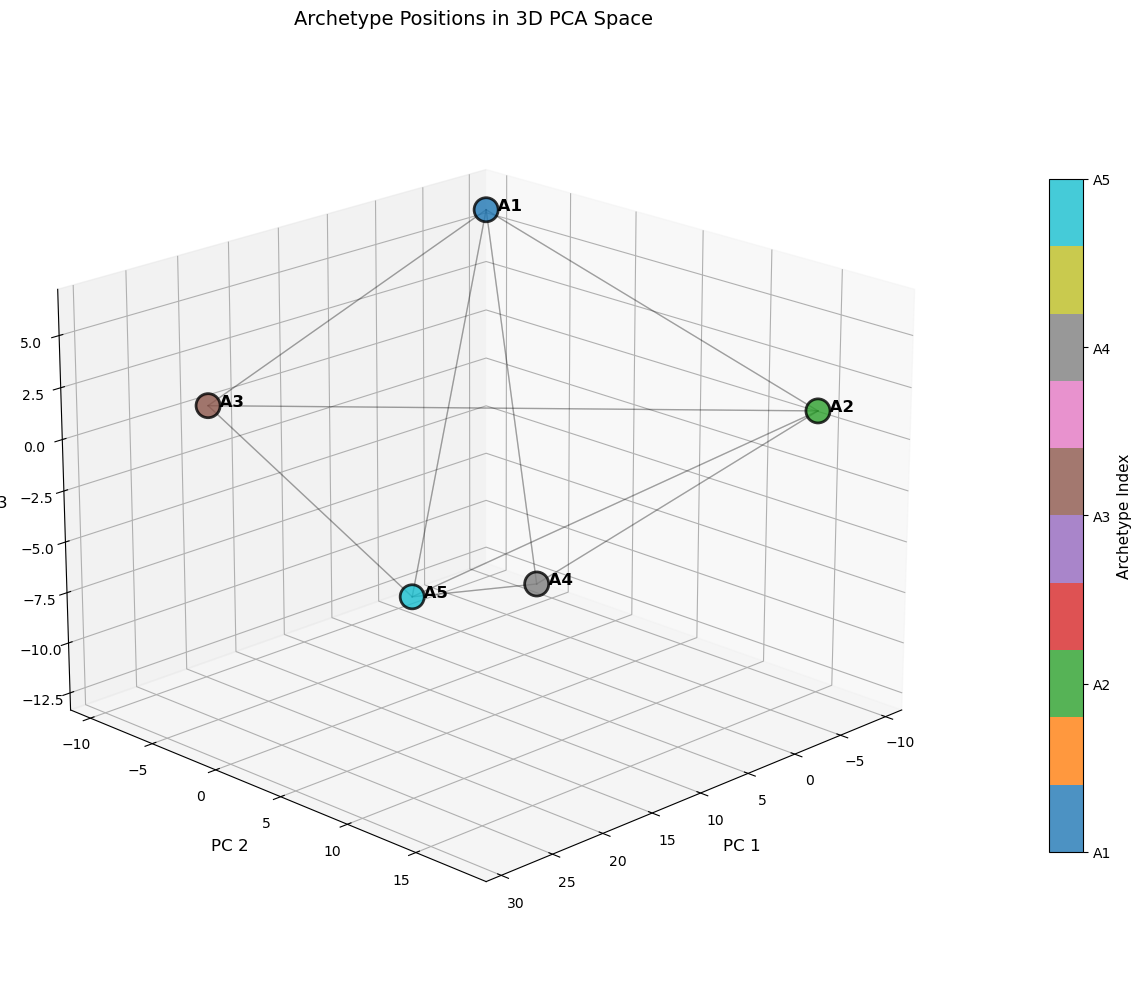

In [4]:
print("Creating archetypal space plots...")

# 2D archetypal space (basic) - Plotly
print("  [1/3] 2D archetypal space...")
fig = pc.pl.archetypal_space(
    adata,
    color_by='archetypes',  # Color by archetype assignment
    save_path='archetypal_space_2d.png' if save_plots else None,
)
fig.show()

# 2D archetypal space with multiple colorings - Plotly
print("  [2/3] Multi-colored archetypal space...")
if 'cell_type' in adata.obs.columns:
    color_options = ['archetypes', 'cell_type']
else:
    color_options = ['archetypes']

# archetypal_space_multi expects a list of adata objects
fig = pc.pl.archetypal_space_multi(
    [adata],  # List of adata objects
    color_by=color_options,
    save_path='archetypal_space_multi.png' if save_plots else None,
)
fig.show()

# 3D archetypal space - Plotly
print("  [3/3] 3D archetypal space...")
fig = pc.pl.archetype_positions_3d(
    adata,
    save_path='archetypal_space_3d.png' if save_plots else None,
)
fig.show()

## Step 3: Training Diagnostics

In [6]:
print("Creating training diagnostic plots...")

# Training metrics over time (Plotly figure)
# display=True shows the plot AND returns the figure
fig = pc.pl.training_metrics(
    results['history'],
    display=show_plots,  # Show if in interactive mode
)
# if save_plots and fig is not None:
#     fig.write_image('training_metrics.png')
#     print("      Saved: training_metrics.png")

Creating training diagnostic plots...


## Step 4: Gene/Pattern Visualizations


Creating gene association plots...
  [1/2] Gene dotplot...
      Saved: gene_dotplot.png
  [2/2] Pattern heatmap...
      (Requires pattern_results from pattern_analysis)


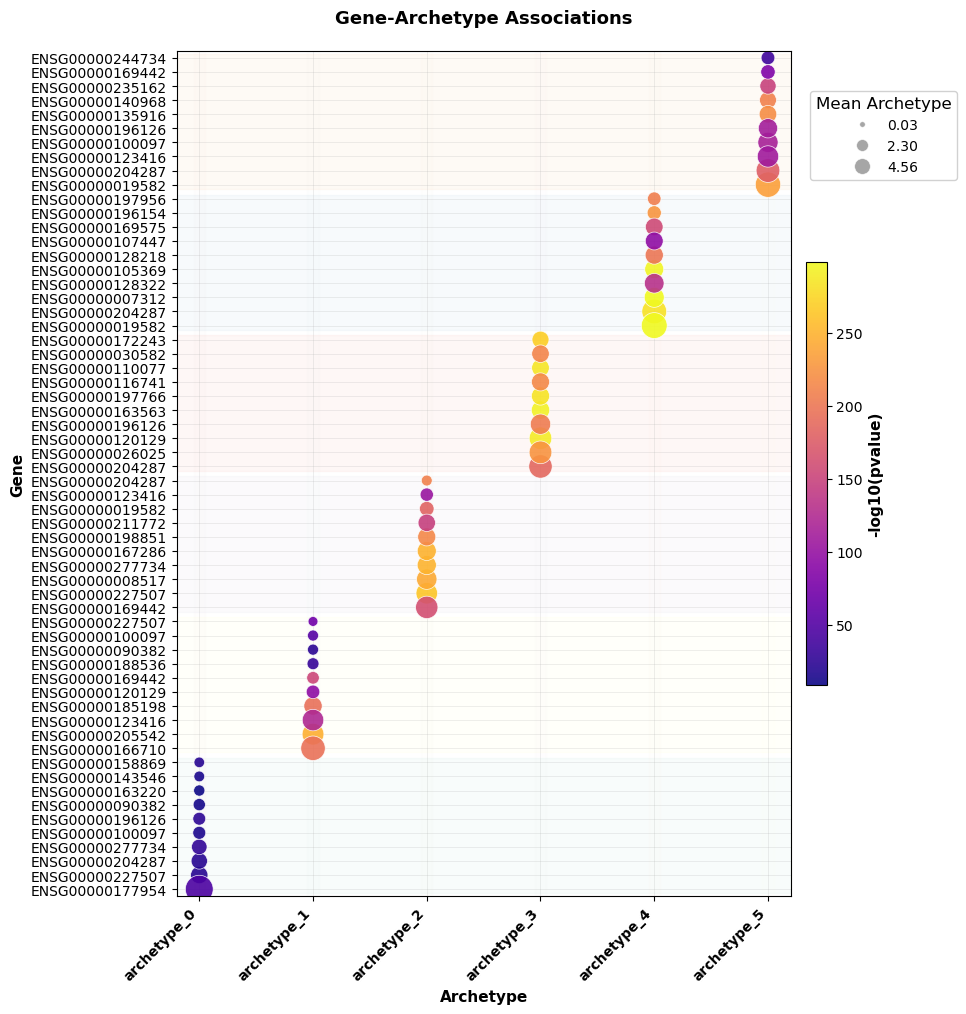

In [7]:
print("\nCreating gene association plots...")

# Dotplot of top genes per archetype
print("  [1/2] Gene dotplot...")

# PEACH dotplot uses gene_associations DataFrame
fig = pc.pl.dotplot(
    gene_assoc,  # Results DataFrame from gene_associations
    x_col='archetype',
    y_col='gene',
    top_n_per_group=10,  # Top 10 genes per archetype
    title='Gene-Archetype Associations',
)
if save_plots:
    fig.savefig('gene_dotplot.png', dpi=150, bbox_inches='tight')
    print("      Saved: gene_dotplot.png")
# With %matplotlib inline, figures display automatically

# Pattern heatmap
print("  [2/2] Pattern heatmap...")
# Note: Requires pattern analysis (conditional_associations, etc.)
# pattern_results = pc.tl.pattern_analysis(adata, ...)
# fig = pc.pl.pattern_heatmap(pattern_results, save_path='pattern_heatmap.png' if save_plots else None)
# if show_plots: fig.show()
print("      (Requires pattern_results from pattern_analysis)")

## Step 5: Archetype Statistics

In [8]:
print("Archetype Statistics and Positions")
print("=" * 50)

# Archetype statistics summary (returns dict, not a plot)
print("\n[1/3] Computing archetype statistics...")
stats = pc.pl.archetype_statistics(adata)
print(f"      Computed {len(stats)} statistics keys")

Archetype Statistics and Positions

[1/3] Computing archetype statistics...
[STATS] Archetype Statistics
Number of archetypes: 5
Embedding dimensions: 50

Distance statistics:
  Mean distance: 40.5274
  Std distance:  5.2711
  Min distance:  28.6883
  Max distance:  47.4993
  Range:         18.8110

Nearest archetypes:  A1 - A2
Farthest archetypes: A3 - A4
      Computed 12 statistics keys



Archetype Positions - 2D Matplotlib
[OK] Figure saved to: archetype_positions_2d.png


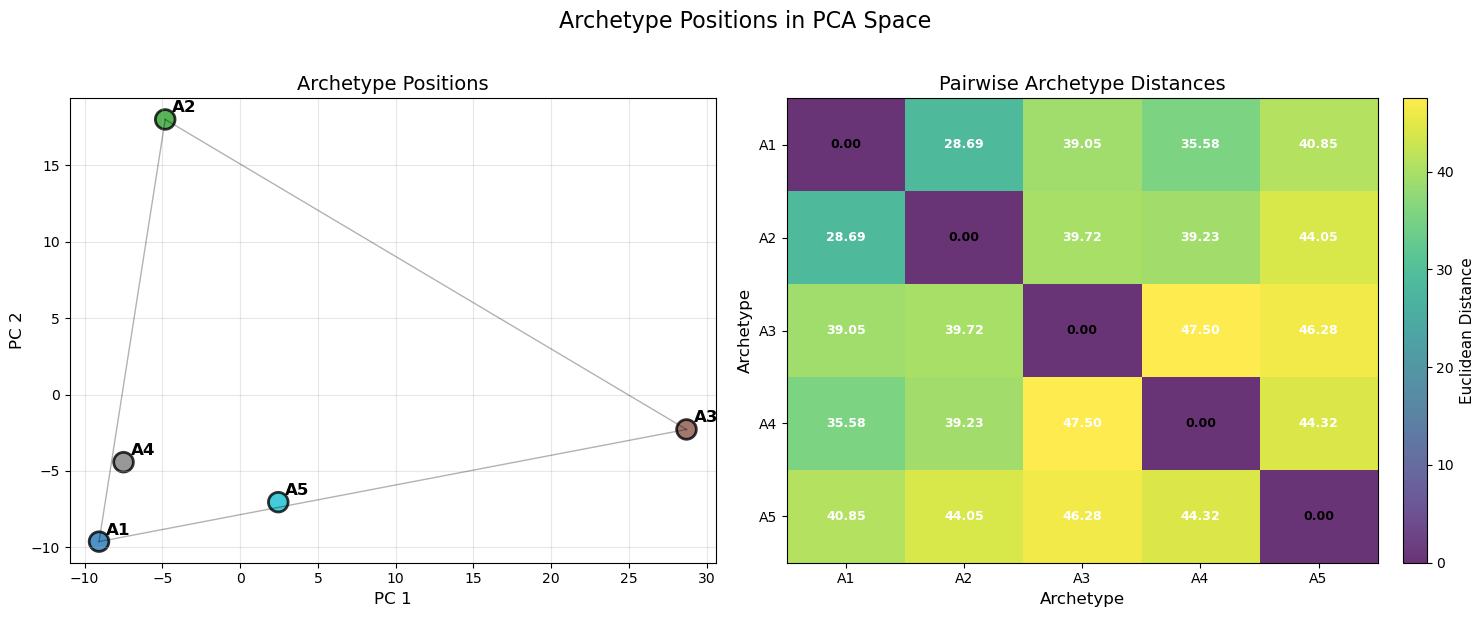

In [9]:
# [2/3] Archetype positions in PCA space (Matplotlib)
print("\nArchetype Positions - 2D Matplotlib")
fig = pc.pl.archetype_positions(
    adata,
    save_path='archetype_positions_2d.png' if save_plots else None,
)
# With %matplotlib inline, figure displays automatically


Archetype Positions - 3D Plotly
[OK] Figure saved to: archetype_positions_3d.png


/var/folders/9j/_p_812p579797bv1xx4zdptx65_s90/T/ipykernel_50567/1994332550.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



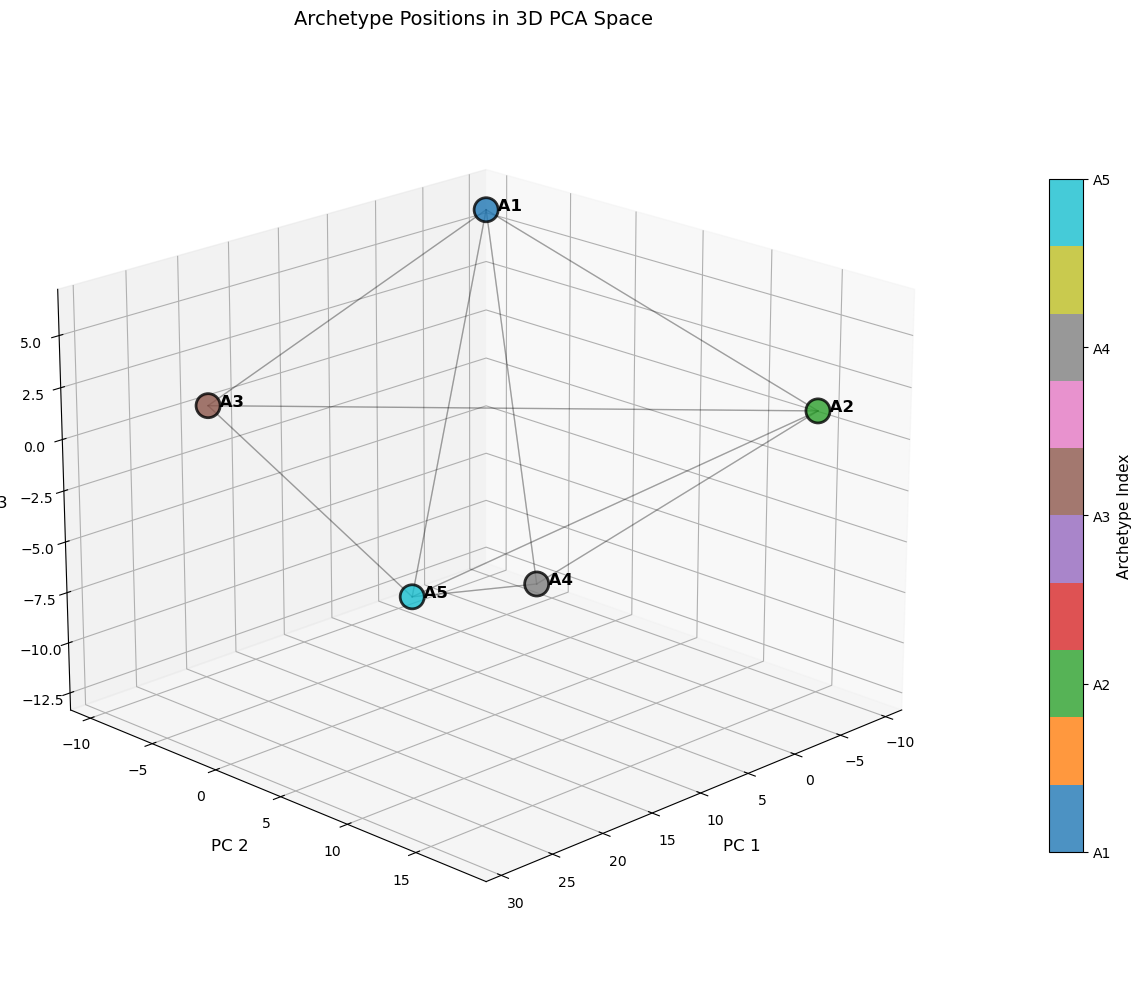

In [10]:
# [3/3] Archetype positions in 3D PCA space (Plotly)
print("\nArchetype Positions - 3D Plotly")
fig = pc.pl.archetype_positions_3d(
    adata,
    save_path='archetype_positions_3d.png' if save_plots else None,
)
# Display the plotly figure
fig.show()

## Step 6: CellRank Visualizations (if available)

In [11]:
print("\n" + "="*70)
print("WORKFLOW 08 COMPLETE")
print("="*70)
print("\nVisualizations created:")
if save_plots:
    print("  Archetypal Space (Plotly):")
    print("    - archetypal_space_2d.png")
    print("    - archetypal_space_multi.png")
    print("    - archetypal_space_3d.png")
    print("  Training Diagnostics (Plotly):")
    print("    - training_metrics.png")
    print("  Gene Associations (Matplotlib):")
    print("    - gene_dotplot.png")
    print("  Archetype Positions:")
    print("    - archetype_positions_2d.png (Matplotlib)")
    print("    - archetype_positions_3d.png (Plotly)")
    print("\n  All plots saved to current directory")

print("\nVisualization functions used:")
print("  Plotly (interactive):")
print("    - pc.pl.archetypal_space()")
print("    - pc.pl.archetypal_space_multi()")
print("    - pc.pl.archetype_positions_3d()")
print("    - pc.pl.training_metrics()")
print("  Matplotlib (static):")
print("    - pc.pl.dotplot()")
print("    - pc.pl.archetype_positions()")
print("  Statistics (dict):")
print("    - pc.pl.archetype_statistics()")

print("\nComplete!")
print("="*70)


WORKFLOW 08 COMPLETE

Visualizations created:
  Archetypal Space (Plotly):
    - archetypal_space_2d.png
    - archetypal_space_multi.png
    - archetypal_space_3d.png
  Training Diagnostics (Plotly):
    - training_metrics.png
  Gene Associations (Matplotlib):
    - gene_dotplot.png
  Archetype Positions:
    - archetype_positions_2d.png (Matplotlib)
    - archetype_positions_3d.png (Plotly)

  All plots saved to current directory

Visualization functions used:
  Plotly (interactive):
    - pc.pl.archetypal_space()
    - pc.pl.archetypal_space_multi()
    - pc.pl.archetype_positions_3d()
    - pc.pl.training_metrics()
  Matplotlib (static):
    - pc.pl.dotplot()
    - pc.pl.archetype_positions()
  Statistics (dict):
    - pc.pl.archetype_statistics()

Complete!


## Summary

In [12]:
print("\n" + "="*70)
print("WORKFLOW 08 COMPLETE")
print("="*70)
print("Visualizations created:")
if save_plots:
    print("  • archetypal_space_2d.png - Basic 2D projection")
    print("  • archetypal_space_multi.png - Multiple colorings")
    print("  • archetypal_space_3d.png - 3D interactive view")
    print("  • training_metrics.png - Training history")
    print("  • gene_dotplot.png - Top genes per archetype")
    print("  • archetype_statistics.png - Statistical summary")
    print("  • archetype_positions.png - Positions in PCA space")
    print("\n  All plots saved to current directory")
else:
    print("  Plots generated (save_plots=False)")

print("\nVisualization functions used:")
print("  • pc.pl.archetypal_space() - 2D projections")
print("  • pc.pl.archetypal_space_multi() - Multiple views")
print("  • pc.pl.archetype_positions_3d() - 3D interactive")
print("  • pc.pl.training_metrics() - Training diagnostics")
print("  • pc.pl.dotplot() - Gene expression patterns")
print("  • pc.pl.archetype_statistics() - Summary statistics")

print("\nComplete PEACH workflow finished!")
print("See docs/INDEX.md for full documentation")
print("="*70)


WORKFLOW 08 COMPLETE
Visualizations created:
  • archetypal_space_2d.png - Basic 2D projection
  • archetypal_space_multi.png - Multiple colorings
  • archetypal_space_3d.png - 3D interactive view
  • training_metrics.png - Training history
  • gene_dotplot.png - Top genes per archetype
  • archetype_statistics.png - Statistical summary
  • archetype_positions.png - Positions in PCA space

  All plots saved to current directory

Visualization functions used:
  • pc.pl.archetypal_space() - 2D projections
  • pc.pl.archetypal_space_multi() - Multiple views
  • pc.pl.archetype_positions_3d() - 3D interactive
  • pc.pl.training_metrics() - Training diagnostics
  • pc.pl.dotplot() - Gene expression patterns
  • pc.pl.archetype_statistics() - Summary statistics

Complete PEACH workflow finished!
See docs/INDEX.md for full documentation
